<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.402410,48.718213,0.002972,127.123595,127.121459,0.002136
1,0.0,1.0,66.883850,76.377784,-0.001209,153.260425,153.261539,-0.001114
2,0.0,2.0,38.675313,25.392386,0.000528,74.068227,74.069010,-0.000783
3,0.0,3.0,45.855745,23.922897,-0.008396,79.770247,79.780074,-0.009828
4,0.0,4.0,85.362105,28.786942,-0.005982,124.143065,124.150711,-0.007646
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.641910,75.481607,-0.000278,112.123240,112.123863,-0.000623
119996,999.0,116.0,25.232420,83.231330,-0.000384,118.463366,118.464101,-0.000735
119997,999.0,117.0,79.420751,74.090439,-0.000037,163.511152,163.511071,0.000082
119998,999.0,118.0,43.365051,78.947635,0.000225,132.312910,132.312880,0.000030


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.402410,48.718213,0.002972,127.123595,127.121459,0.002136
1,0.0,1.0,66.883850,76.377784,-0.001209,153.260425,153.261539,-0.001114
2,0.0,2.0,38.675313,25.392386,0.000528,74.068227,74.069010,-0.000783
3,0.0,3.0,45.855745,23.922897,-0.008396,79.770247,79.780074,-0.009828
4,0.0,4.0,85.362105,28.786942,-0.005982,124.143065,124.150711,-0.007646
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.641910,75.481607,-0.000278,112.123240,112.123863,-0.000623
119996,999.0,116.0,25.232420,83.231330,-0.000384,118.463366,118.464101,-0.000735
119997,999.0,117.0,79.420751,74.090439,-0.000037,163.511152,163.511071,0.000082
119998,999.0,118.0,43.365051,78.947635,0.000225,132.312910,132.312880,0.000030


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.402410  48.718213  0.002972  127.123595  127.121459  0.002136
      1.0    66.883850  76.377784 -0.001209  153.260425  153.261539 -0.001114
      2.0    38.675313  25.392386  0.000528   74.068227   74.069010 -0.000783
      3.0    45.855745  23.922897 -0.008396   79.770247   79.780074 -0.009828
      4.0    85.362105  28.786942 -0.005982  124.143065  124.150711 -0.007646
...                ...        ...       ...         ...         ...       ...
999.0 115.0  26.641910  75.481607 -0.000278  112.123240  112.123863 -0.000623
      116.0  25.232420  83.231330 -0.000384  118.463366  118.464101 -0.000735
      117.0  79.420751  74.090439 -0.000037  163.511152  163.511071  0.000082
      118.0  43.365051  78.947635  0.000225  132.312910  132.312880  0.000030
      119.0  49.500605  92.297457  0.000235  151.798297  151.798191  0.000106

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.402410  48.718213  0.002972  127.123595  127.121459  0.002136
      1.0    66.883850  76.377784 -0.001209  153.260425  153.261539 -0.001114
      2.0    38.675313  25.392386  0.000528   74.068227   74.069010 -0.000783
      3.0    45.855745  23.922897 -0.008396   79.770247   79.780074 -0.009828
      4.0    85.362105  28.786942 -0.005982  124.143065  124.150711 -0.007646
...                ...        ...       ...         ...         ...       ...
999.0 115.0  26.641910  75.481607 -0.000278  112.123240  112.123863 -0.000623
      116.0  25.232420  83.231330 -0.000384  118.463366  118.464101 -0.000735
      117.0  79.420751  74.090439 -0.000037  163.511152  163.511071  0.000082
      118.0  43.365051  78.947635  0.000225  132.312910  132.312880  0.000030
      119.0  49.500605  92.297457  0.000235  151.798297  151.798191  0.000106

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.402410,48.718213,0.002972,127.123595,127.121459,0.002136
1,0.0,1.0,66.883850,76.377784,-0.001209,153.260425,153.261539,-0.001114
2,0.0,2.0,38.675313,25.392386,0.000528,74.068227,74.069010,-0.000783
3,0.0,3.0,45.855745,23.922897,-0.008396,79.770247,79.780074,-0.009828
4,0.0,4.0,85.362105,28.786942,-0.005982,124.143065,124.150711,-0.007646
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.641910,75.481607,-0.000278,112.123240,112.123863,-0.000623
119996,999.0,116.0,25.232420,83.231330,-0.000384,118.463366,118.464101,-0.000735
119997,999.0,117.0,79.420751,74.090439,-0.000037,163.511152,163.511071,0.000082
119998,999.0,118.0,43.365051,78.947635,0.000225,132.312910,132.312880,0.000030


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.402410  48.718213  0.002972  127.123595  127.121459  0.002136
      1.0    66.883850  76.377784 -0.001209  153.260425  153.261539 -0.001114
      2.0    38.675313  25.392386  0.000528   74.068227   74.069010 -0.000783
      3.0    45.855745  23.922897 -0.008396   79.770247   79.780074 -0.009828
      4.0    85.362105  28.786942 -0.005982  124.143065  124.150711 -0.007646
...                ...        ...       ...         ...         ...       ...
999.0 115.0  26.641910  75.481607 -0.000278  112.123240  112.123863 -0.000623
      116.0  25.232420  83.231330 -0.000384  118.463366  118.464101 -0.000735
      117.0  79.420751  74.090439 -0.000037  163.511152  163.511071  0.000082
      118.0  43.365051  78.947635  0.000225  132.312910  132.312880  0.000030
      119.0  49.500605  92.297457  0.000235  151.798297  151.798191  0.000106

[120000 rows x 6 columns]

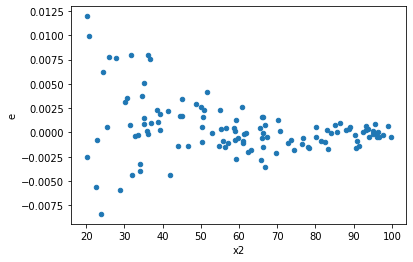

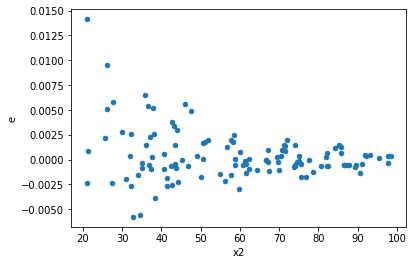

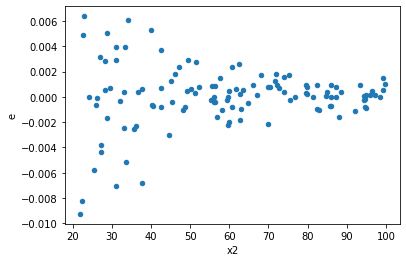

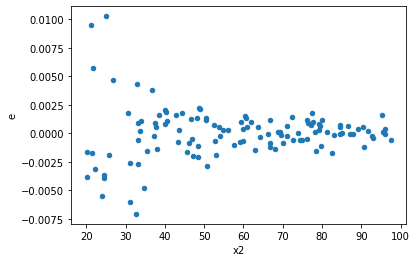

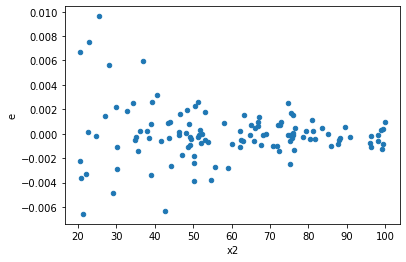

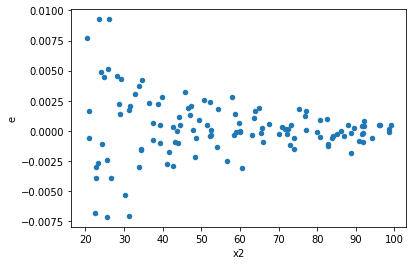

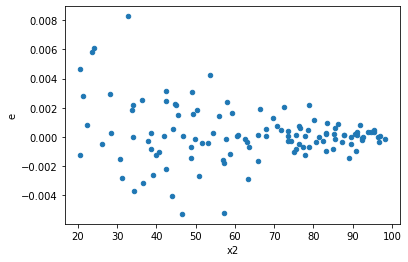

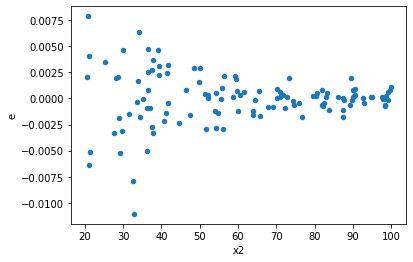

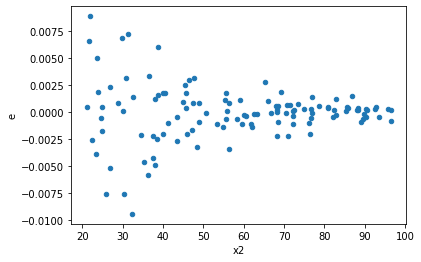

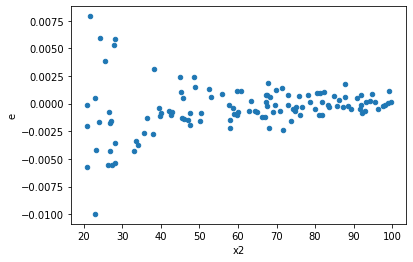

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,0.0005798253818644057,9.074962624698933e-05,1.260489960574795e-05,1.9728179618910725e-06,0.15651199324042608,4.118138647816822e-09,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,0.0005490856401105629,9.019123034326184e-05,1.1936644350229628e-05,1.960678920505692e-06,0.16425712813232757,9.33725424305349e-09,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,0.0004934416541914367,0.00013447095109127505,1.0726992482422535e-05,2.923281545462501e-06,0.27251641597145226,2.1923528660778308e-05,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,0.0004981726609348586,3.4540345148185685e-05,1.082984045510562e-05,7.508770684388192e-07,0.06933408405705789,9.453816354998912e-16,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,0.0004523896744761196,7.27450988099129e-05,9.834558140785208e-06,1.5814151915198457e-06,0.16080185493657398,6.52196228448822e-09,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,0.0006695473694317017,5.569449619018571e-05,1.4555377596341342e-05,1.2107499171779502e-06,0.08318230902386797,3.539373166768177e-14,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,0.0002821972352056134,5.40541951182302e-05,6.134722504469856e-06,1.1750911982223957e-06,0.19154757160836625,1.1620581238303024e-07,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,0.00044308137796836435,3.317360204143938e-05,9.632203868877485e-06,7.211652617704213e-07,0.07487022405127564,4.409141209706816e-15,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,0.0004994286043067966,0.0001715072537395559,1.0857143571886882e-05,3.728418559555563e-06,0.3434069499835853,0.0004239321128605369,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    993
Reject001=1 : Homoscedasticity        7
Name: Result_test, dtype: int64